In [ ]:
# 비지도학습

In [3]:
# !wet http://bit.ly/fruits_300_data -0 fruits_300.npy

'wet'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# fruits = pd.read
fruit = np.load('../datafiles/fruits_300.npy')
print(fruit.shape)

(300, 100, 100)


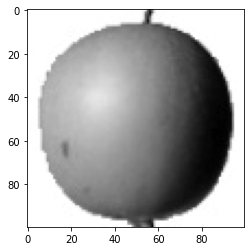

In [8]:
plt.imshow(fruit[0], cmap='gray_r')
plt.show()

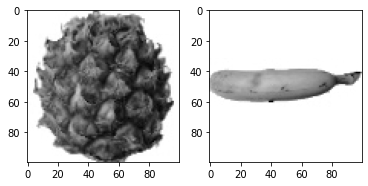

In [10]:
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruit[100], cmap='gray_r')
axs[1].imshow(fruit[200], cmap='gray_r')
plt.show()

In [17]:
# 픽셀값 분석하기
apple = fruit[0:100].reshape(-1, 100*100)
pineapple = fruit[100:200].reshape(-1, 100*100)
banana = fruit[200:300].reshape(-1, 100*100)

# 확인
print(pineapple.shape)
print(pineapple.mean(axis=1))

(100, 10000)
[ 99.3239  87.1622  97.193   97.4689  98.8892  97.8819  95.1444  92.9461
  95.8412  96.9487  93.2863 101.2771  91.6511  98.3901  84.3277 100.7017
  99.0229  87.5298  99.4109  91.8568  90.3877  99.5066  95.8498  96.0728
 100.0062  95.5283  95.2715  98.1624  93.1395  99.1666  99.9519  96.732
  94.16   100.7644 101.1263  98.2852  98.5354 101.3809  95.4862  93.1256
  87.6404  93.7146  94.7279  85.5131  95.0937  95.3236  92.7696  94.4375
  99.36    95.8924  97.8221  99.4014  99.325   95.025   97.5771  97.3511
  99.4891  97.366  101.0062  91.2304  95.2824  95.3544 101.4657  97.5239
  98.8419  96.746   98.2922  96.3969  81.9464  93.4927  97.3872  82.4883
  95.3665  95.2541 101.3074  97.2391  95.4544 100.5576 100.2927  94.3088
  95.7401  97.0982  96.9559  92.9114  97.4164 100.769   97.808   99.2481
 101.0643  94.8173  99.2639  98.8539  97.2198  97.0201  94.5039  98.097
  95.0201  98.8078  99.4634 100.0257]


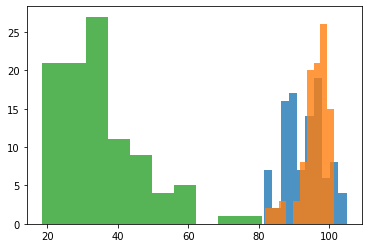

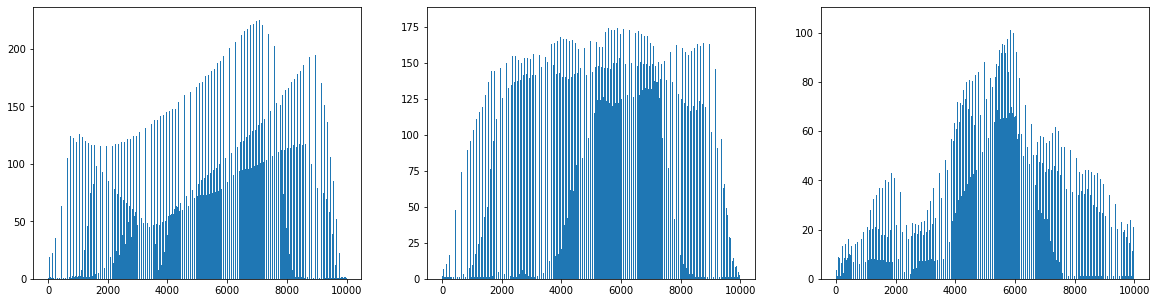

In [22]:
# 과일 값 시각화
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)

# 픽셀 평균값
fig, axs = plt.subplots(1, 3, figsize=(20,5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

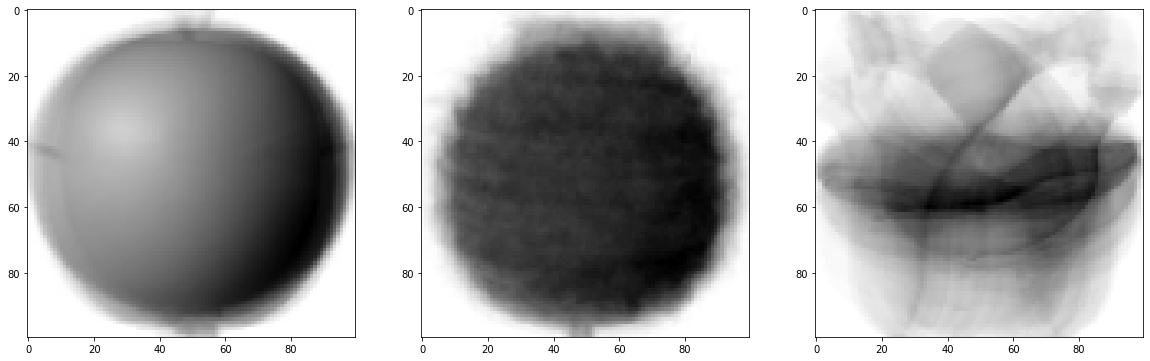

In [24]:
# 픽셀 100x100 크기로 전환 -> 이미지 출력 후 그래프와 비교하기

apple_mean = np.mean(apple, axis=0).reshape(100,100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100,100)
banana_mean = np.mean(banana, axis=0).reshape(100,100)
fig, axs = plt.subplots(1, 3, figsize=(20,10))
axs[0].imshow(apple_mean, cmap='gray_r')
axs[1].imshow(pineapple_mean, cmap='gray_r')
axs[2].imshow(banana_mean, cmap='gray_r')
plt.show()


(300,)


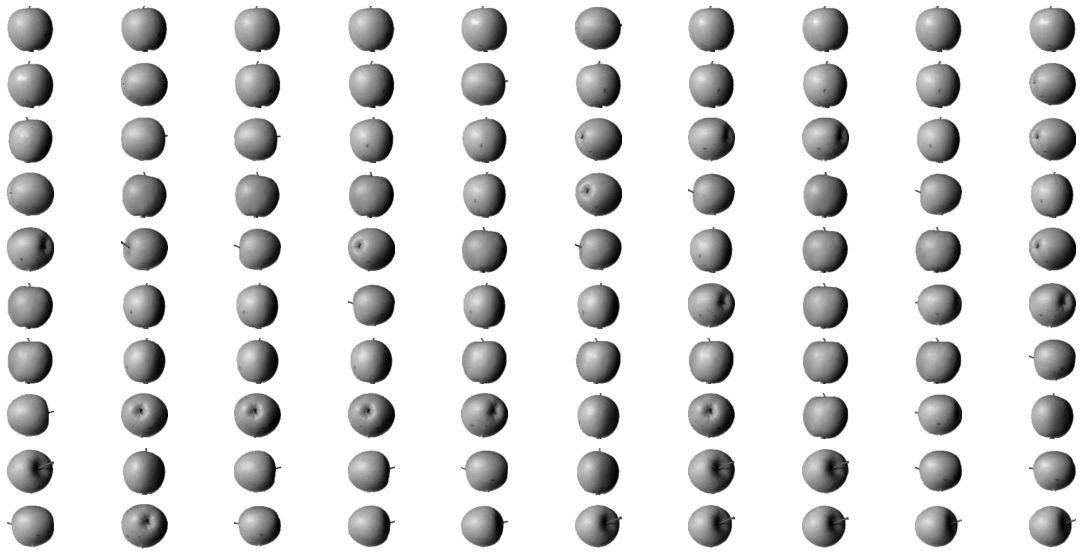

In [27]:
# 평균값과 비슷한 사진 고르기
# np.abs -> 원소 절대값 구하기
abs_diff = np.abs(fruit - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))
print(abs_mean.shape)

# 그래프 그리기
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(20,10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruit[apple_index[i*10 + j]], cmap='gray_r')
        axs[i, j].axis('off')
plt.show()
